In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [3]:
pn.log_.level = 3
PL = pipeline.PipeLine(data_dir = '/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/NGC6778_MUSEstat_maps/maps',
                       name = 'NGC6778_MUSE_b_*.fits', error_str='error')
PL_al = pipeline.PipeLine(data_dir = '/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/NGC6778_MUSEstat_maps/maps',
                       name = 'NGC6778_MUSE_b_*.fits', error_str='error_alfalike')

     Observation.readData: Reading S2_6716A from NGC6778_MUSE_b_S2_6716A.fits
     Observation.readData: Reading error S2_6716A from NGC6778_MUSE_b_S2_6716A_error.fits
     Observation.readData: Reading He1r_8733A from NGC6778_MUSE_b_He1r_8733A.fits
     Observation.readData: Reading error He1r_8733A from NGC6778_MUSE_b_He1r_8733A_error.fits
warng EmissionLine: line 8733A for atom He1r not valid
     Observation.readData: Reading H1r_4861A from NGC6778_MUSE_b_H1r_4861A.fits
     Observation.readData: Reading error H1r_4861A from NGC6778_MUSE_b_H1r_4861A_error.fits
     Observation.readData: Reading He1r_6678A from NGC6778_MUSE_b_He1r_6678A.fits
     Observation.readData: Reading error He1r_6678A from NGC6778_MUSE_b_He1r_6678A_error.fits
     Observation.readData: Reading N2r_5676A from NGC6778_MUSE_b_N2r_5676A.fits
     Observation.readData: Reading error N2r_5676A from NGC6778_MUSE_b_N2r_5676A_error.fits
warng EmissionLine: line 5676A for atom N2r not valid
     Observation.readData: 

In [4]:
dic = PL.obs.getError(returnObs=True)
dic_alfa = PL_al.obs.getError(returnObs=True)

/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:239: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(subplot_kw={'projection': self.obs.wcs}, figsize=(8,8))


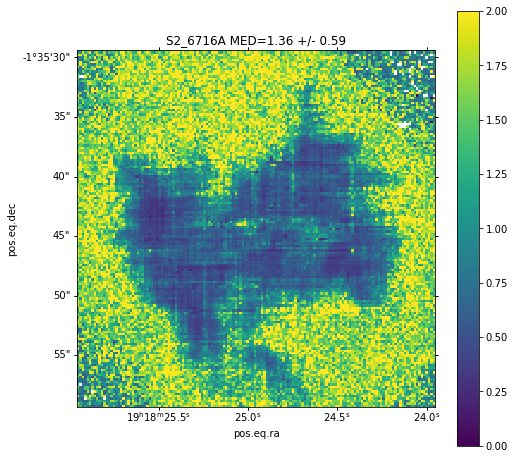

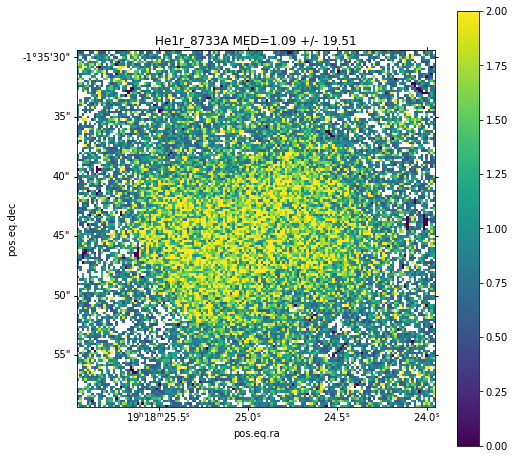

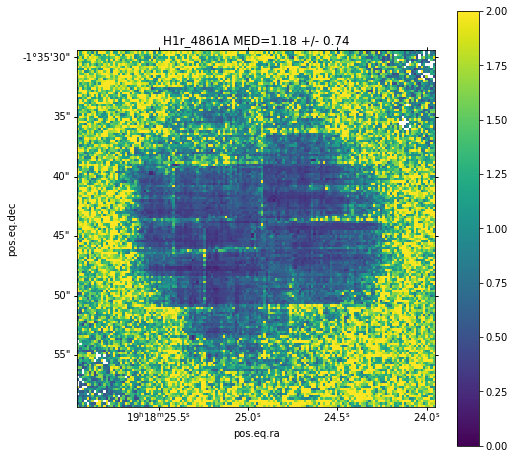

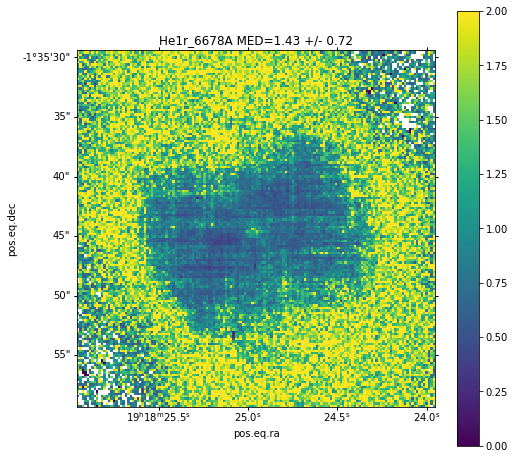

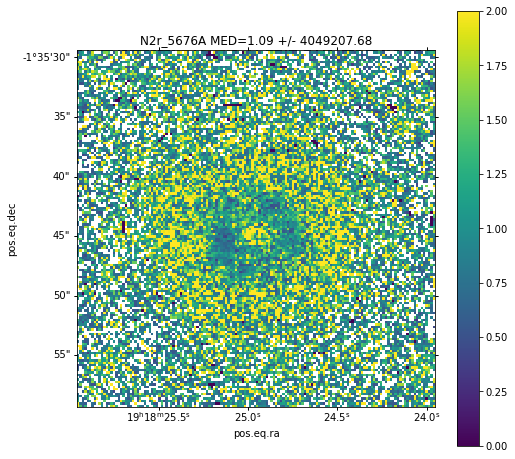

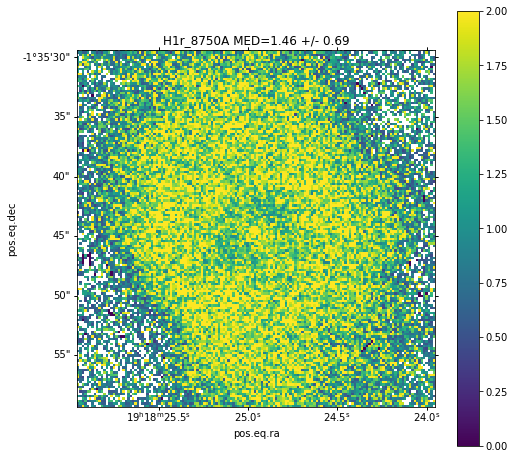

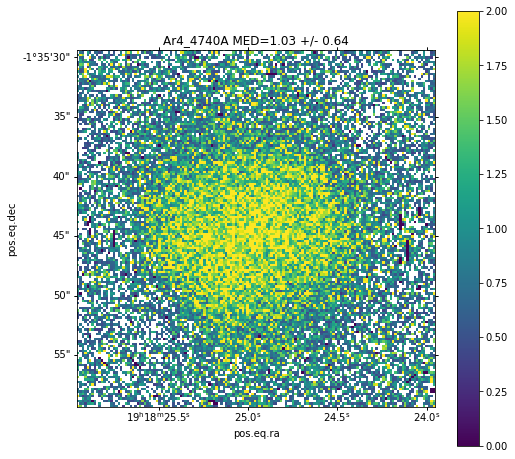

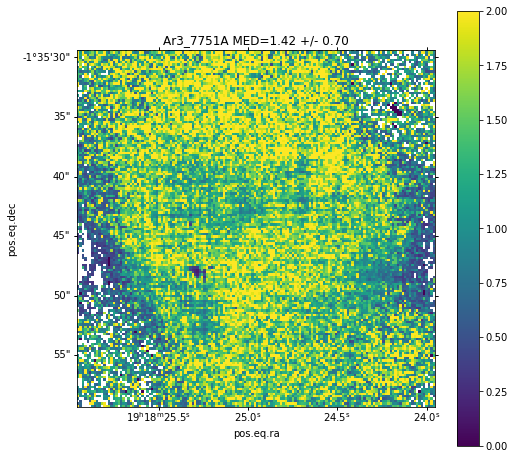

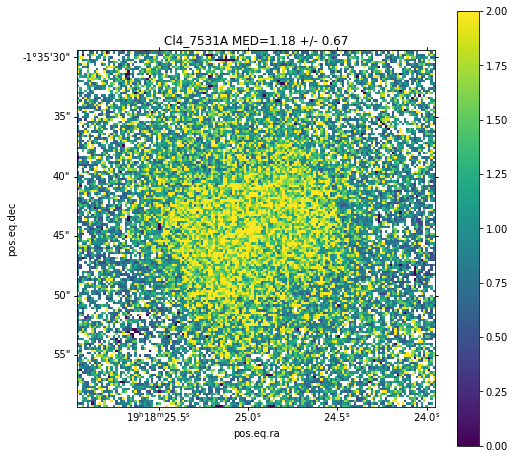

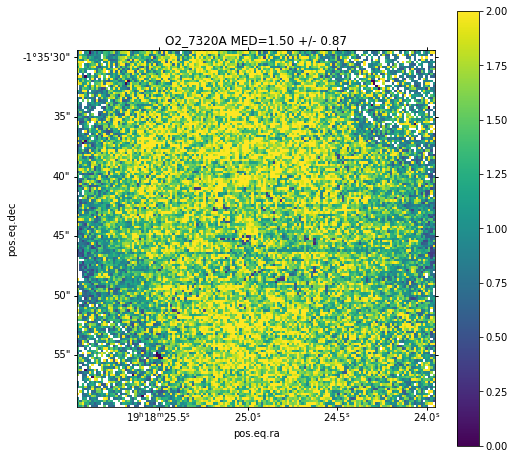

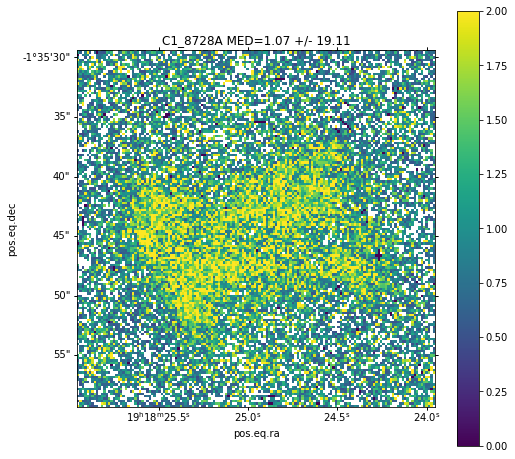

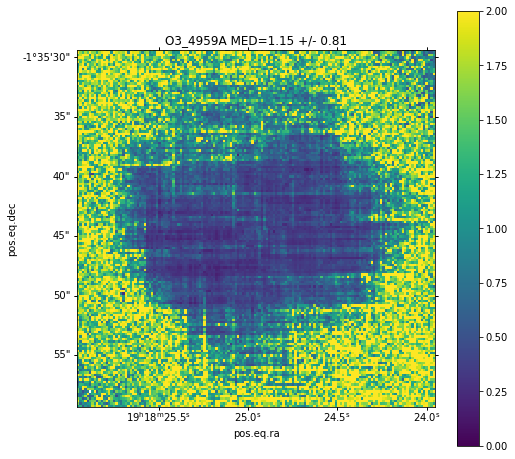

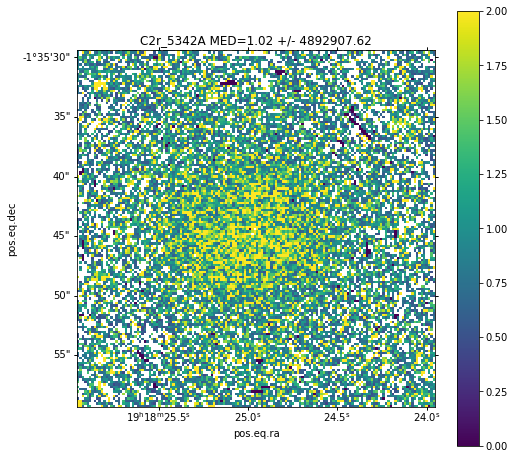

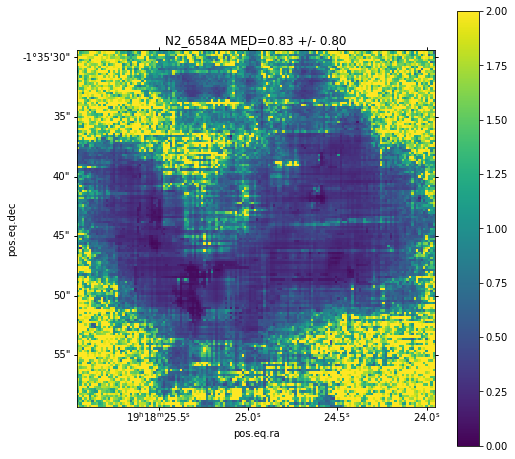

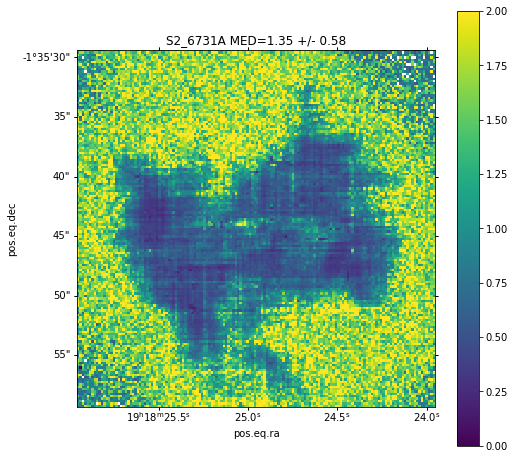

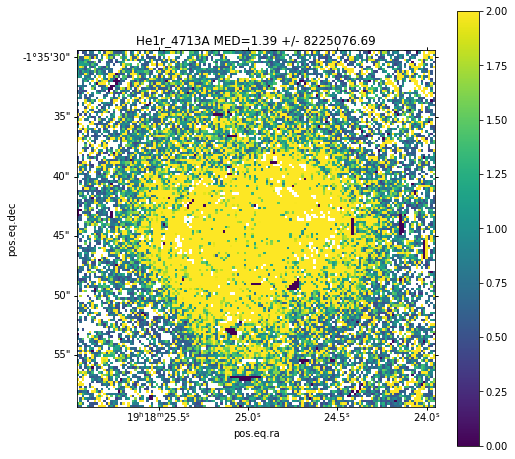

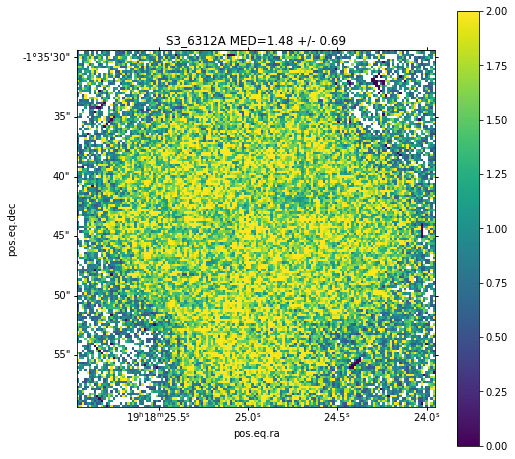

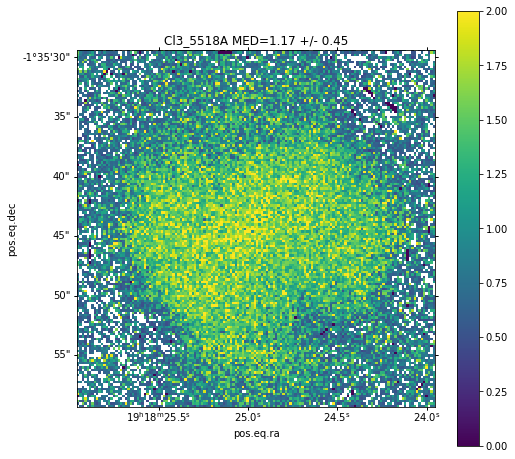

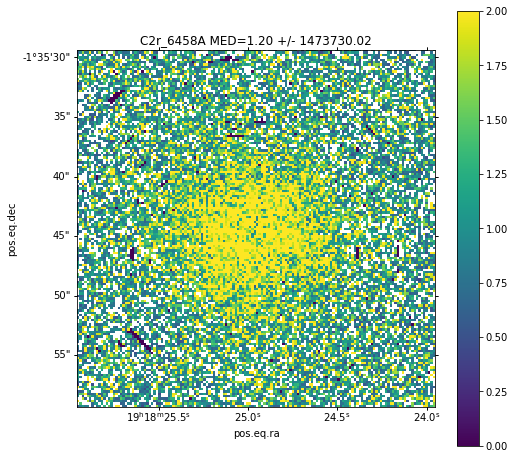

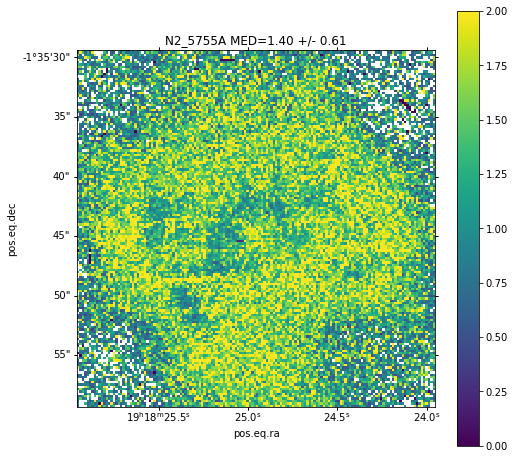

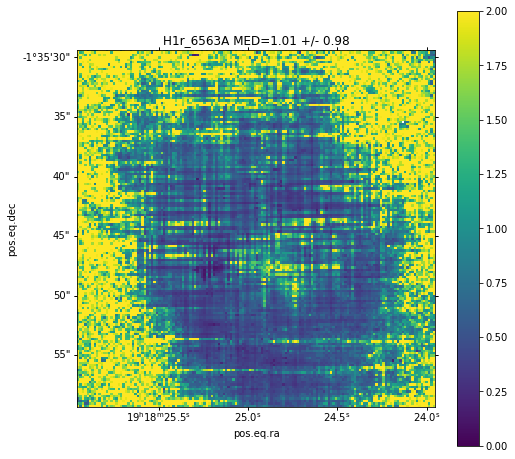

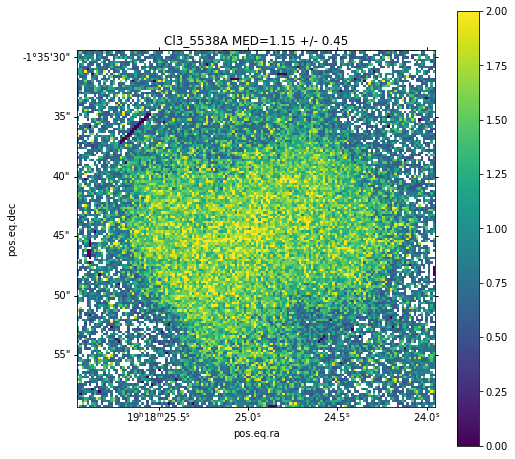

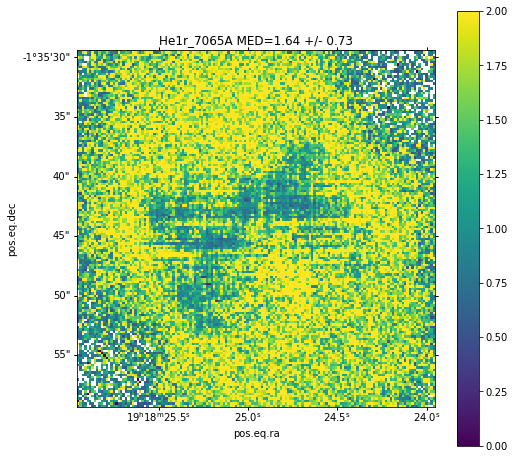

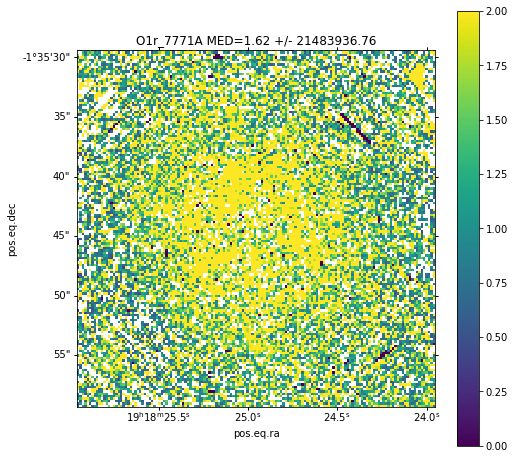

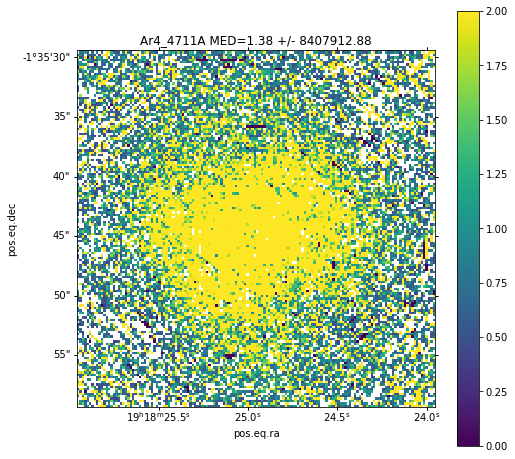

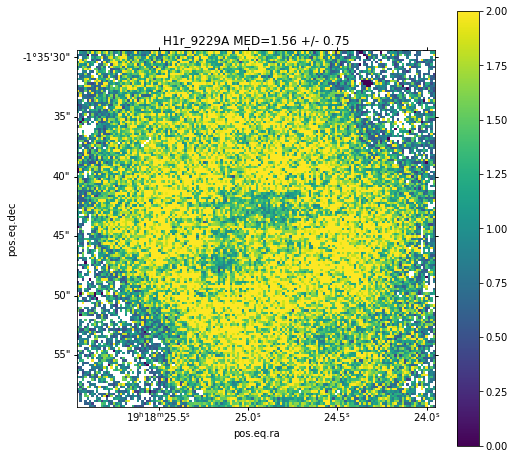

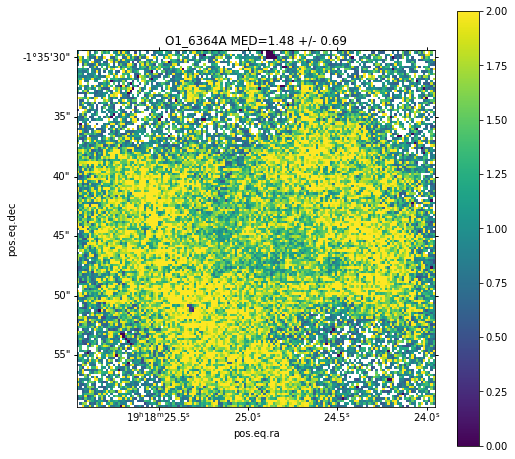

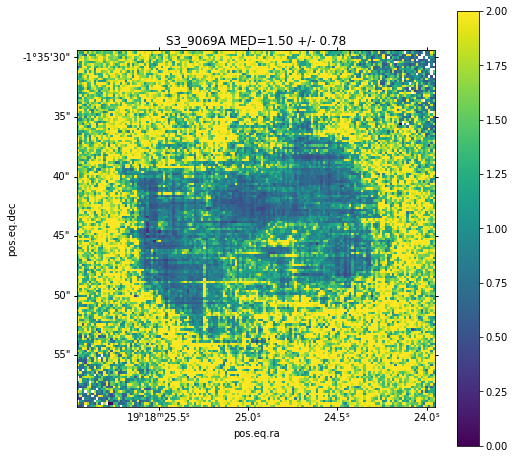

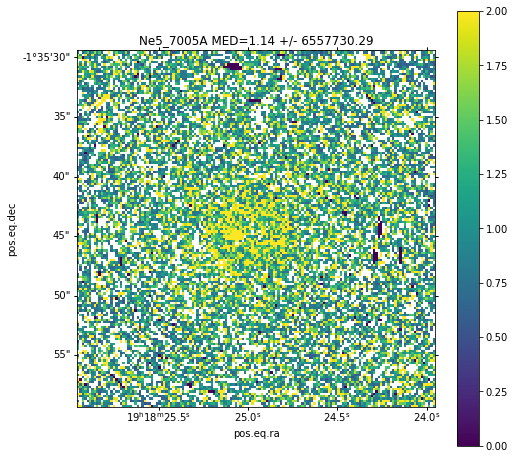

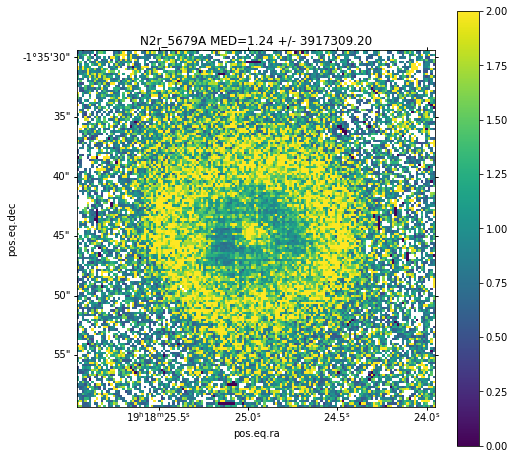

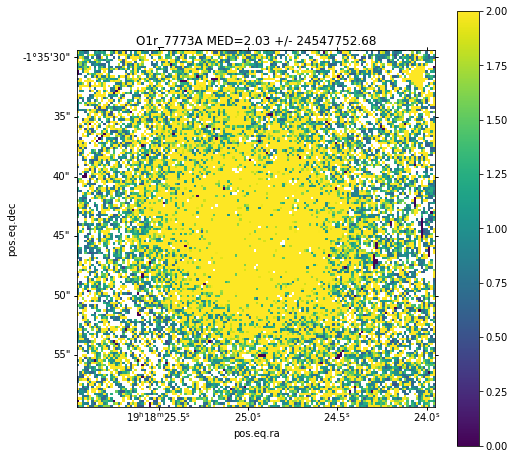

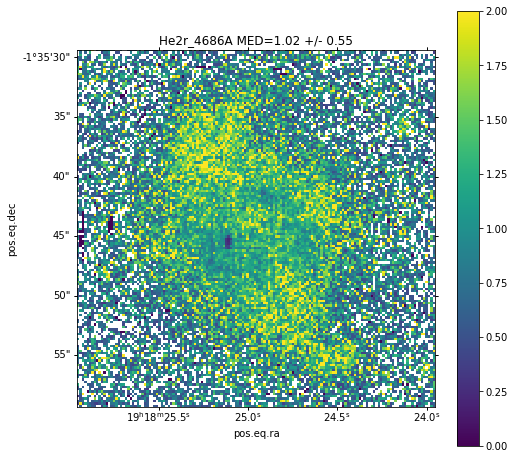

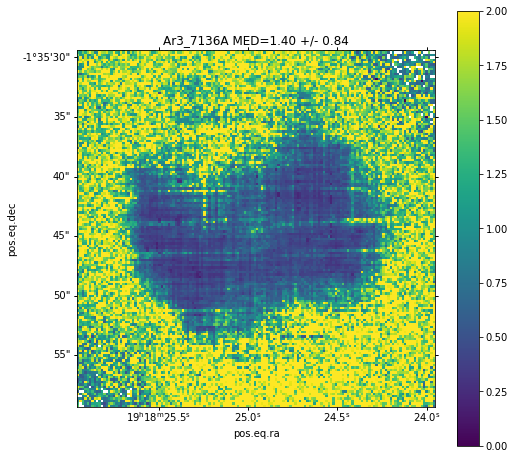

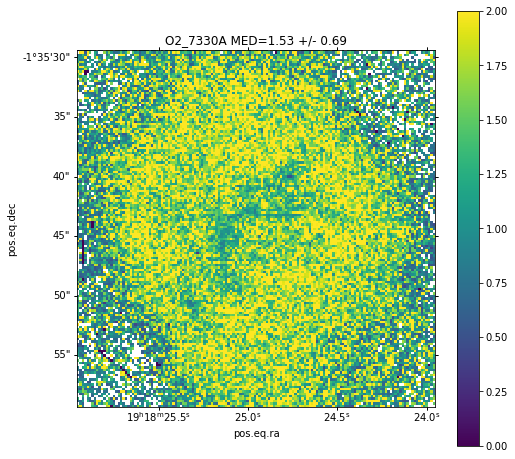

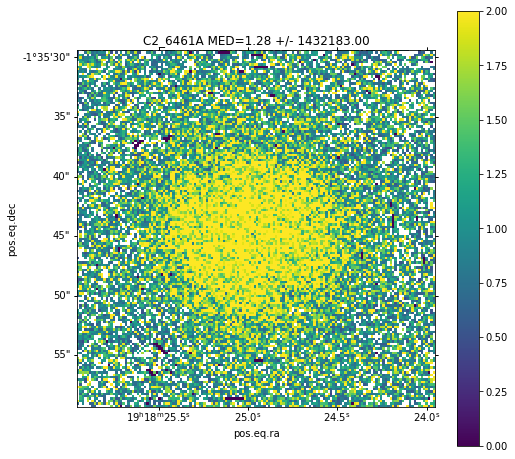

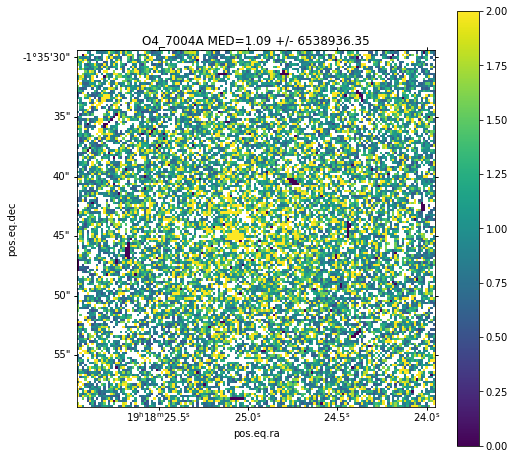

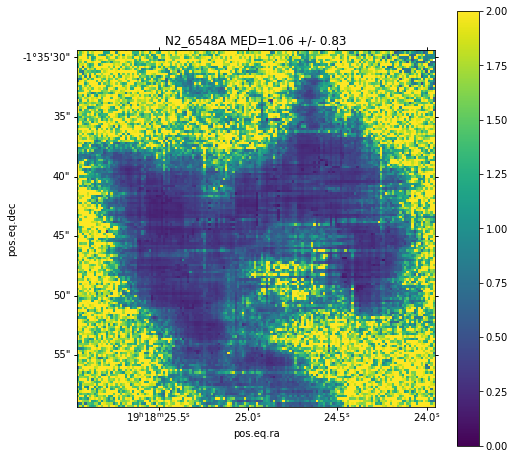

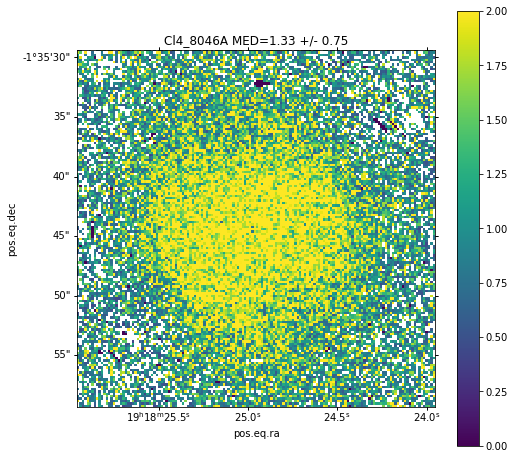

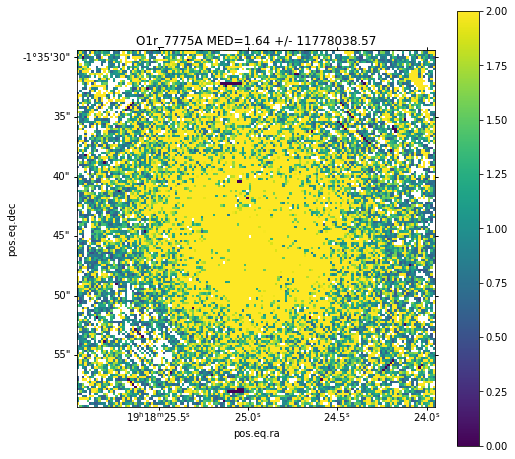

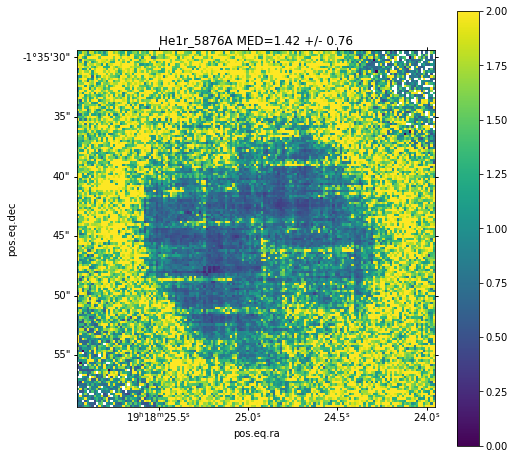

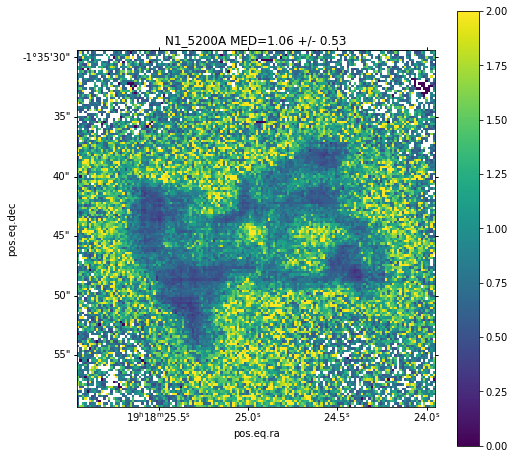

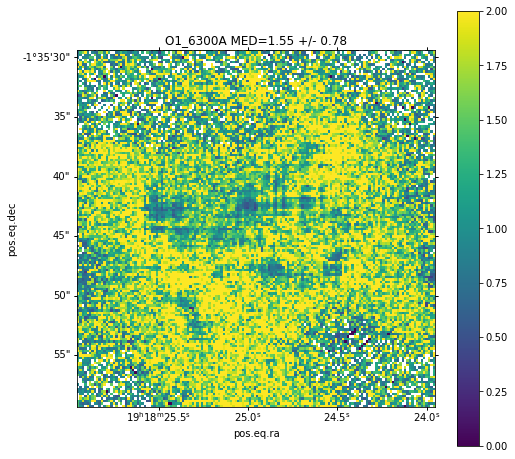

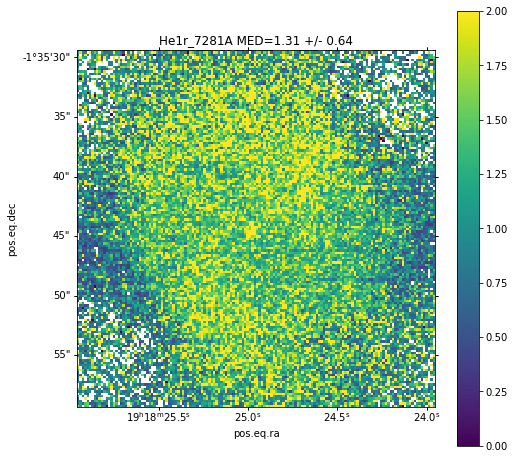

In [7]:
for line in dic:
    data = dic[line]/dic_alfa[line]
    mask = np.isfinite(data)
    med = np.median(data[mask])
    std = np.std(data[mask])
    PL.plot(data=data, title='{} MED={:.2f} +/- {:.2f}'.format(line, med, std), vmin=.0,vmax=2.)